In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
from lcmcmc.utils import get_data_dir_path

In [3]:
#Load the data for the header file and photometric file.
path_perfect_sims_phot = "/sps/lsst/users/bbiswas/data/kilonova_datasets/RESSPECT/RESSPECT_PERFECT_LIGHTCURVE_WITH_KN.csv"
path_perfect_sims_head = "/sps/lsst/users/bbiswas/data/kilonova_datasets/RESSPECT/RESSPECT_PERFECT_HEAD_WITH_KN.csv"

df_head = pd.read_csv(path_perfect_sims_head)
df_phot = pd.read_csv(path_perfect_sims_phot)

In [4]:
#extract the objects as in the KN paper 

selected_ids = np.load(os.path.join(get_data_dir_path(), "selected_ids.npy"))

df_head = df_head[df_head["SNID"].isin(list(selected_ids))]
df_phot = df_phot[df_phot["SNID"].isin(list(selected_ids))]

In [5]:
# Use only g and r band

mask = (df_phot['FLT'] == 'g') | (df_phot['FLT'] == 'r')
df_phot = df_phot[mask]

# Preprocessing

In [6]:
from lcmcmc.preprocessing import add_object_band_index, preprocess_SNANA, extract_subsample

In [7]:
df_head, df_phot=extract_subsample(df_head=df_head, df_phot=df_phot, event_type="random", num_sample=50)

In [8]:
df_phot

,SNID,MJD,FLT,FLUXCAL,FLUXCALERR,SNR
18475,4815.0,53194.0,g,0.294892,0.142876,2.063967
18476,4815.0,53194.0,r,-0.079503,0.141841,-0.560508
18481,4815.0,53196.0,g,-0.081813,0.141841,-0.576793
18482,4815.0,53196.0,r,0.165399,0.142422,1.161328
18487,4815.0,53198.0,g,0.079487,0.142121,0.559296
...,...,...,...,...,...,...
5496013,10990.0,53447.0,r,0.002615,0.003337,0.783619
5496014,10990.0,53449.0,r,-0.003189,0.004157,-0.767144
5496015,10990.0,53451.0,r,0.005382,0.005037,1.068443
5496016,10990.0,53453.0,r,-0.000491,0.002636,-0.186297


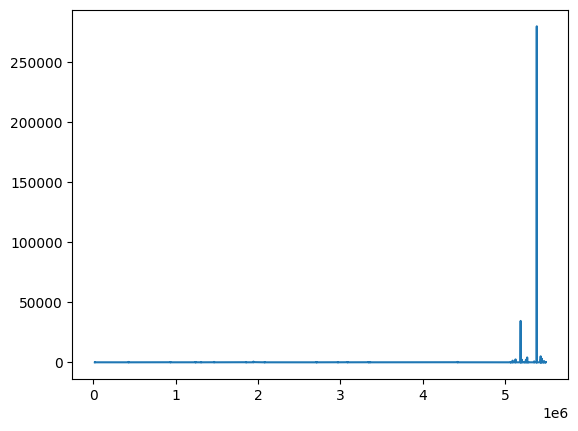

In [9]:
import matplotlib.pyplot as plt
plt.plot(df_phot["SNR"])

In [10]:
df_phot = add_object_band_index(df_phot)

In [11]:
df_phot

,SNID,MJD,FLT,FLUXCAL,FLUXCALERR,SNR,object_index,band_index
18475,4815.0,53194.0,g,0.294892,0.142876,2.063967,0,1
18476,4815.0,53194.0,r,-0.079503,0.141841,-0.560508,0,0
18481,4815.0,53196.0,g,-0.081813,0.141841,-0.576793,0,1
18482,4815.0,53196.0,r,0.165399,0.142422,1.161328,0,0
18487,4815.0,53198.0,g,0.079487,0.142121,0.559296,0,1
...,...,...,...,...,...,...,...,...
5496013,10990.0,53447.0,r,0.002615,0.003337,0.783619,49,0
5496014,10990.0,53449.0,r,-0.003189,0.004157,-0.767144,49,0
5496015,10990.0,53451.0,r,0.005382,0.005037,1.068443,49,0
5496016,10990.0,53453.0,r,-0.000491,0.002636,-0.186297,49,0


In [12]:
# get only 20 days of data before and after maximum 

new_object_df = preprocess_SNANA(df_head=df_head, df_phot=df_phot, norm_bands="individual")
new_object_df = new_object_df[((new_object_df["time"]>-10) & (new_object_df["time"]<20))]
new_object_df = new_object_df[new_object_df["time"]%6==0]

{'SNID': 18475    4815.0
18476    4815.0
18481    4815.0
18482    4815.0
18487    4815.0
          ...  
19064    4815.0
19069    4815.0
19070    4815.0
19075    4815.0
19076    4815.0
Name: SNID, Length: 202, dtype: float64, 'time': array([-46., -44., -42., -40., -38., -36., -34., -32., -30., -28., -26.,
       -24., -22., -20., -18., -16., -14., -12., -10.,  -8.,  -6.,  -4.,
        -2.,   0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,
        20.,  22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,
        42.,  44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,
        64.,  66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,
        86.,  88.,  90.,  92.,  94.,  96.,  98., 100., 102., 104., 106.,
       108., 110., 112., 114., 116., 118., 120., 122., 124., 126., 128.,
       130., 132., 134., 136., 138., 140., 142., 144., 146., 148., 150.,
       152., 154., -56., -54., -52., -50., -48., -46., -44., -42., -40.,
       -38., -36., -34., -32., -30.,

In [13]:
data_dir = get_data_dir_path()
new_object_df.to_csv(os.path.join(data_dir, "perfect_sims.csv"))

In [14]:
[[10,4]] * 4

[[10, 4], [10, 4], [10, 4], [10, 4]]